In [ ]:
# ITI 1120
# Assignment 4
# Due Date: April 10, 2021
# Crasta, Mevil
# 8250420

Write a function called tally_scores that takes as a parameter the name of a file that contains a series of student records and that prints a summary of each student record.  A student record will begin with a name followed by a sequence of integer test scores.  The name is guaranteed to be one word and at the beginning of the line.  You may assume that each student has at least one test score.  Your function should produce two lines of output for each student: one showing the student's name and test scores and a second line showing the average score.
For example, if a file called records.txt contains the following:

	John 71 83 94 
	Sally 94 85 
	Fred 90 95 82 85
  and the following call is made:
  
    tally_scores(records)
 the following output should be produced:

	John: 71 83 94
	average = 82.66666666666667
	Sally: 94 85
	average = 89.5
	Fred: 90 95 82 85
	average = 88.0

You are to exactly reproduce the format of this output.  You may not construct any extra data structures to solve this problem.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [82]:
def tally_scores(file_name):
  '''(None)->None
  Prints the student record from file_name
  and the average of their scores.
  Precondition: student name is atleast one word
  and atleast one score. '''

  data_path='/content/drive/My Drive/ITI1120/Assignment4/'
  file_open=open(data_path+file_name).read().splitlines()

  for i in range(len(file_open)):
    average=0 # tracks the average
    num_of_scores=0 # tracks the number of test scores
    print(file_open[i]) # prints the name and scores in one line
    file_open_elem=file_open[i].split(" ")
  
    for j in file_open_elem[1:]:
      average+=int(j)
      num_of_scores+=1
    print("Average =", average/num_of_scores)

In [83]:
tally_scores('records.txt')

John 71 83 94
Average = 82.66666666666667
Sally 94 85
Average = 89.5
Fred 90 95 82 85
Average = 88.0


Write a function called underline that takes a file name as a parameter and that prints the words one per line with certain words underlined.  The words to be underlined all begin with a period.  The period should not be printed.  You should print the text that follows the period on a line by itself followed by a line of alternating dashes and commas equal in length to the text that follows the period. 

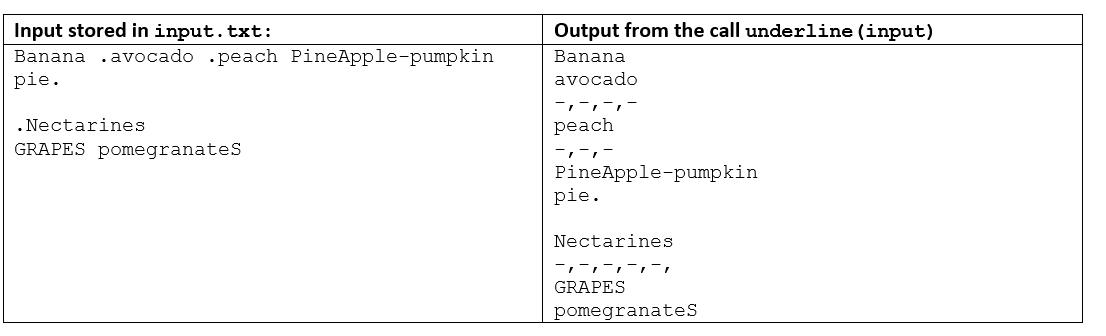


Notice that input lines can be blank lines.  You may not construct any extra data structures to solve this problem other than strings.


In [29]:
def underline(txt_file):
  '''(None) -> None
  Prints each word from txt_file into a
  new line, with words starting with a leading zero
  underlined with "-" and ",".
  '''

  file_path='/content/drive/My Drive/ITI1120/Assignment4/'
  txt_open=open(file_path+txt_file).read().splitlines()
  
  # splits each word in above list by " "
  for i in txt_open:
    split_txt=i.split(" ")

    # go through each word in the split list
    for word in split_txt:
      if word!="": # if word is not a blank line
        if word[0]==".": # if first character of word is a period
          print(word[1:],end="\n")

          # this prints the underline
          for k in range(len(word)-1):
            if k%2==0:
              print("-",end="")
            else:
              print(",",end="")
          print()

        # if first character is not period, just print the word in new line  
        elif word[0]!=".":
          print(word)

      # if word is a blank line, just print a blank line
      elif word=="":
        print() 

In [30]:
underline("input.txt")

Banana
avacado
-,-,-,-
peach
-,-,-
PineApple-pumpkin
pie.

Nectarines
-,-,-,-,-,
GRAPES
pomegranateS


Write a function called merge_dict that takes two dictionaries, merge them, and returns a new dictionary. The returned dictionary should contain all the keys of the passed dictionaries. Moreover, the values of the common keys will be merged together in one list. However, the values of the unique keys should stay in the same format they have appeared in the input dictionaries.
For example if you had the following dictionaries:


d1 = {1:"Moh", 2:"Aseel", 3:"Batoul", 4:["Taylor", "Chan", "Laura"]}

d2 = {1: "Nahid", 2:"Carter", 3:"John", 6:"Odak"} 

Output:

{1: ['Nahid', 'Moh'], 2: ['Carter', 'Aseel'], 3: ['John', 'Batoul'], 6: 'Odak', 4: ['Taylor', 'Chan', 'Laura']}

Another Example:

d1 = {1:"Moh", 2:"Aseel", 3:"Batoul", 4:["Taylor", "Chan", "Laura"]}

d2 = {1: "Nahid", 2:"Carter", 5:"John", 4:"Odak"}


output:

{1: ['Nahid', 'Moh'], 2: ['Carter', 'Aseel'], 5: 'John', 4: ['Taylor', 'Chan', 'Laura', 'Odak'], 3: 'Batoul'}

In [137]:
def merge_dict(d1,d2):
  '''(dict,dict) -> dict
  Returns a merged dictionary from d1 and d2,
  with common values grouped in a list.
  '''

  d3={} # empty dictionary

  # checks which dicitonary is bigger 
  # Starts looping through the bigger dictionary and compares keys with smaller dictionary
  if len(d1)>len(d2):
    larger=d1
    smaller=d2
  else:
    larger=d2
    smaller=d1

  # Loops through bigger dictionary since more items to loop through w/out running out of range
  for key in larger:
    if key in smaller: # checks if key is also found in smaller dictionary

      # checks if either dict has a value made of a list, then appends another value with the same
      # key using the .append method
      if type(larger[key]) == list:
        d3.update({key:[larger[key].append(smaller[key])]})
      elif type(smaller[key]) == list:
        d3.update({key:[smaller[key].append(larger[key])]})
      # if the value is not a list, add the value directly
      else:
        d3.update({key:[larger[key],smaller[key]]})
        smaller.pop(key) # remove the common key and value from smaller dict
    # if the key is unique, add it to d3
    else:
      d3.update({key:larger[key]})

  #Checking to ensure the smaller dictionary is still empty
  if len(smaller) != 0:
    d3.update(smaller)   
     
  return d3


In [138]:
d1 = {1:"Moh", 2:"Aseel", 3:"Batoul", 4:["Taylor", "Chan", "Laura"]} 
d2 = {1: "Nahid", 2:"Carter", 3:"John", 6:"Odak"}
merge_dict(d1,d2)

{1: ['Nahid', 'Moh'],
 2: ['Carter', 'Aseel'],
 3: ['John', 'Batoul'],
 4: ['Taylor', 'Chan', 'Laura'],
 6: 'Odak'}

In [139]:
d1 = {1:"Moh", 2:"Aseel", 3:"Batoul", 4:["Taylor", "Chan", "Laura"]}  
d2 = {1: "Nahid", 2:"Carter", 5:"John", 4:"Odak"}
merge_dict(d1,d2) 

{1: ['Nahid', 'Moh'],
 2: ['Carter', 'Aseel'],
 3: 'Batoul',
 4: ['Taylor', 'Chan', 'Laura', 'Odak'],
 5: 'John'}

In [ ]:
# Question 4

In [155]:
class Student:

  # "self" relates each unique student to their attribute (the variable used in the class)

  def __init__(self,name,id,score):
    '''initialization function'''

    # each time a student is introduced, comes here to fill in their info
    # attributes
    self.name=name
    self.id=id
    self.score=score

  def getStdName(self):
    '''Returns student name'''
    return self.name

  def getStdId(self):
    '''Returns students id'''
    return self.id

  def getStdScore(self):
    '''Returns students scores'''
    return self.score

  def __str__(self):
    print("Name: " + self.name)
    print("Id: " + self.id)
    print("Score: " + self.score)


class Section:
  def __init__(self,course_name,course_selection):
    '''initialization function'''

    self.course_name=course_name
    self.course_selection=course_selection
    self.std_list = [] # no need to provide std_list as a parameter. Can just initialize it here.

  def add(self, student_object):
    '''adds a student object to std_list'''

    # std_list is a list of objects
    self.std_list.append(student_object)
    print("New Student \"" + student_object.getStdName() + "\" was added successfully!")

  def remove(self, student_object):
    '''removes a student object from std_list'''

    self.std_list.remove(student_object)
    print("\nRemoved \"" + student_object.getStdName() + "\" from section!")
  
  def updateScore(self, student_object, std_score):
    '''updates score in student object inside std_list'''

    student_object.score = std_score
    print("\n"+student_object.getStdName() + " has updated their score!")

  def displaySection(self):
    '''displays all attributes of the student object in std_list'''

    print("\nList of all students in Section:")
    for std in self.std_list:
      print(std.getStdName(), std.getStdId(), std.getStdScore())   

  def averageScore(self):
    '''calculates average of student scores'''

    avg = 0
    for std in self.std_list:
      avg += std.score
    avg = avg/len(self.std_list)
    print("\nAverage of entire section: " , round(avg,2))

In [156]:
s1= Student("Mohamad","600053",100)
s2= Student("Hoda","700060",200)
s3= Student("Hassan","800090",300)
sec= Section("ITI1120","Section E")
sec.add(s1)
sec.add(s2)
sec.add(s3)
sec.displaySection()
sec.updateScore(s1,500)
sec.displaySection()
sec.averageScore()
sec.remove(s3)
sec.displaySection()
sec.averageScore()

New Student "Mohamad" was added successfully!
New Student "Hoda" was added successfully!
New Student "Hassan" was added successfully!

List of all students in Section:
Mohamad 600053 100
Hoda 700060 200
Hassan 800090 300

Mohamad has updated their score!

List of all students in Section:
Mohamad 600053 500
Hoda 700060 200
Hassan 800090 300

Average of entire section:  333.33

Removed "Hassan" from section!

List of all students in Section:
Mohamad 600053 500
Hoda 700060 200

Average of entire section:  350.0
